In [1]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

  Using cached h5netcdf-1.6.1-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.6.1-py3-none-any.whl (49 kB)
Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

  Using cached xarray-2025.3.1-py3-none-any.whl.metadata (12 kB)
Using cached xarray-2025.3.1-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install toolz

  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter


In [6]:
def contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

    ax.clabel(cc, cc.levels, inline=True, fontsize=10)

    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

### **<font color="Purple"> Datos históricos </font>**

In [7]:
tas_file = 'tas_day_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19500101-20141230.nc'

In [11]:
tas_file = 'datasets/v_daily1979-2024_MAY-AGO.nc'
tas_ds=xr.open_dataset(tas_file)
# tas=tas_ds['tas']
tas_ds

<xarray.Dataset> Size: 2GB
Dimensions:         (valid_time: 5658, pressure_level: 3, latitude: 61,
                     longitude: 94, time: 4)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 45kB 1979-05-01 ... 2024-08-31
  * pressure_level  (pressure_level) float64 24B 850.0 500.0 200.0
  * latitude        (latitude) float64 488B 50.0 49.25 48.5 ... 6.5 5.75 5.0
  * longitude       (longitude) float64 752B -133.0 -132.2 ... -64.0 -63.25
Dimensions without coordinates: time
Data variables:
    v               (time, valid_time, pressure_level, latitude, longitude) float32 2GB ...

In [8]:
#archivo historical
tas_ds=xr.open_dataset(tas_file)
tas=tas_ds['tas']

In [9]:
#Covertir K a °C
tas=tas-273.15

In [10]:
#Seleccionar el periodo de 1979 a 2014
tas79 = tas.where(tas.time.dt.year >= 1979, drop=True)

In [11]:
lats=tas.lat
lons=tas.lon

###### <h1  style="color:purple; font-size:20px;"><i> Climatología de temperatura superficial </i> </h1>

In [12]:
# Promedio de temperatura por estación 
tas_estacion=tas79.groupby(tas79.time.dt.season).mean(dim='time')
tas_djf = tas_estacion[0]

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Estacional </i> </h1>

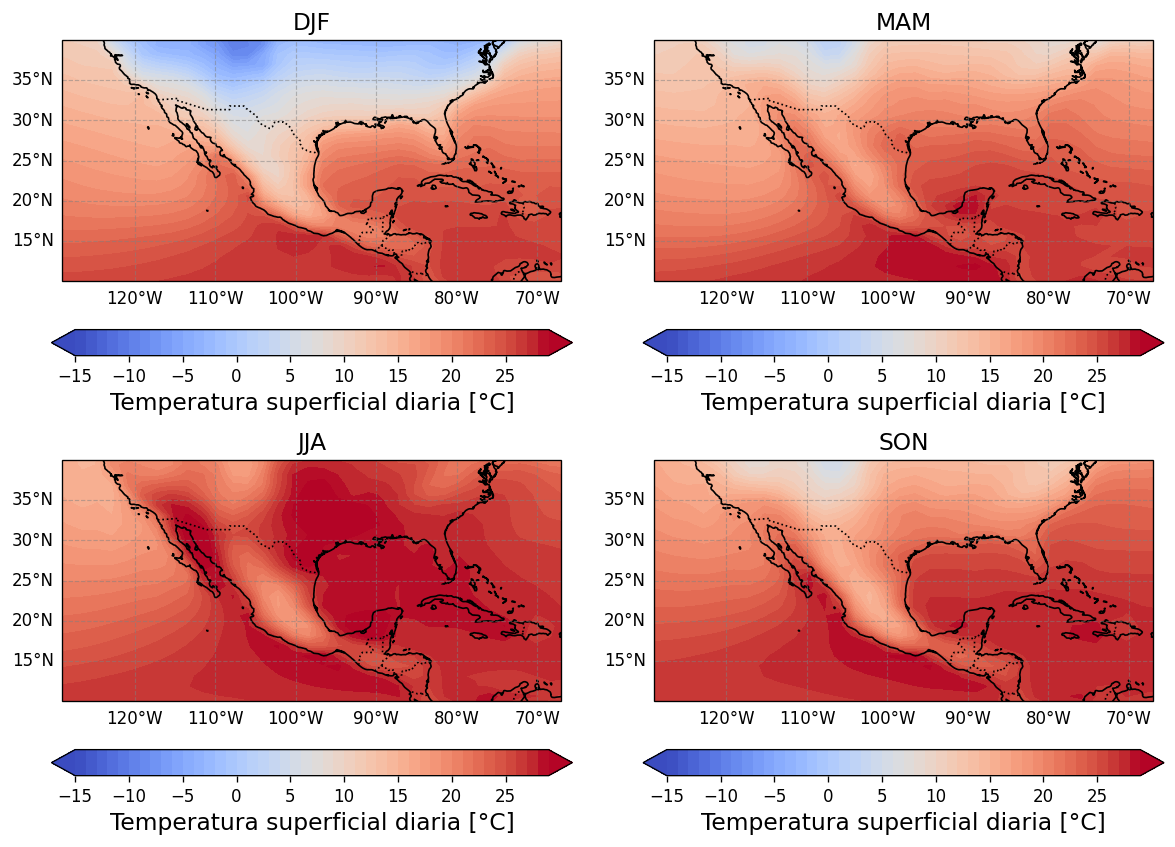

In [13]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    mean_temperatura=tas_estacion.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    datatemp, lon = add_cyclic_point(mean_temperatura, coord=lons)
    
    cs=ax.contourf(lon,lats,datatemp,levels=np.arange(-15,30,1),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Temperatura superficial diaria [°C]', fontsize=14)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Invierno </i> </h1>

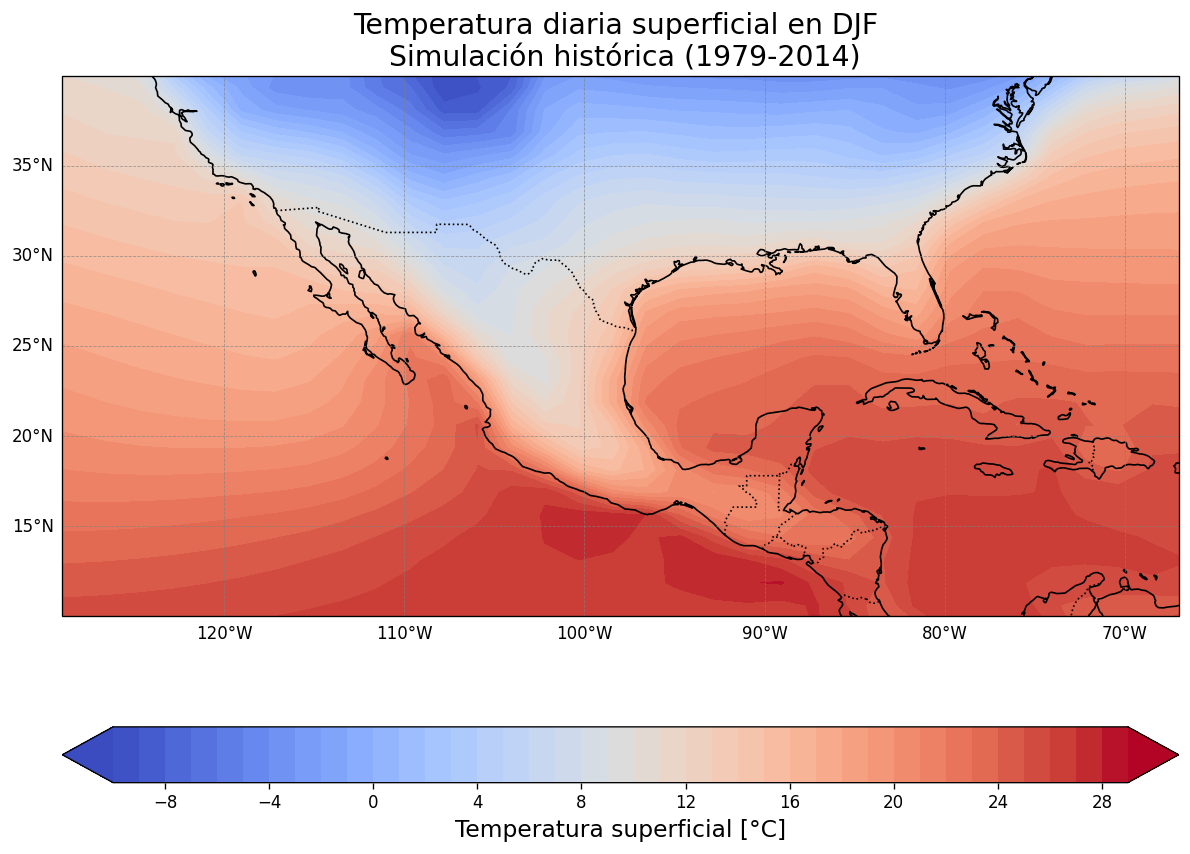

In [14]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
datatemp, lon = add_cyclic_point(tas_djf, coord=lons)
cs=ax.contourf(lon,lats,datatemp,levels=np.arange(-10,30,1),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura diaria superficial en DJF \n Simulación histórica (1979-2014)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

#### <h1  style="color:purple; font-size:20px;"><i> Desviación estándar de temperatura superficial </i> </h1>

In [15]:
anual=tas79.groupby(tas79.time.dt.year).std(dim='time').mean(dim='year') # Desviación de temperatura anual
######### esto esta bien? ^^^^
desv=tas79.groupby(tas79.time.dt.season).std(dim='time') # Desviación de temperatura por estación
desv_inv=desv[0]

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anual </i> </h1>

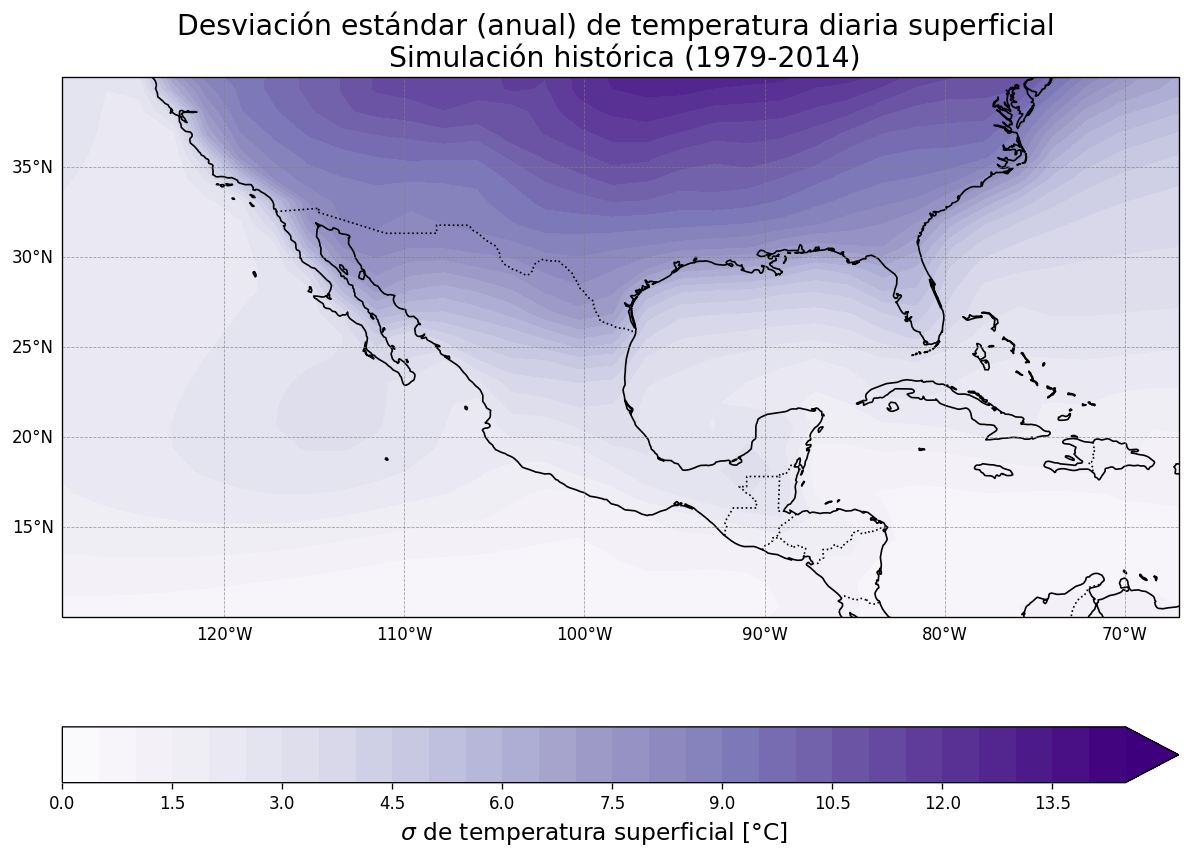

In [16]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
datadesv_a, lon = add_cyclic_point(anual, coord=lons)
cs=ax.contourf(lon,lats,datadesv_a,levels=np.arange(0,15,0.5),cmap='Purples',extend='max',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel(r'$\sigma$ de temperatura superficial [°C]', fontsize=14)
plt.title('Desviación estándar (anual) de temperatura diaria superficial \n Simulación histórica (1979-2014)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Estacional </i> </h1>

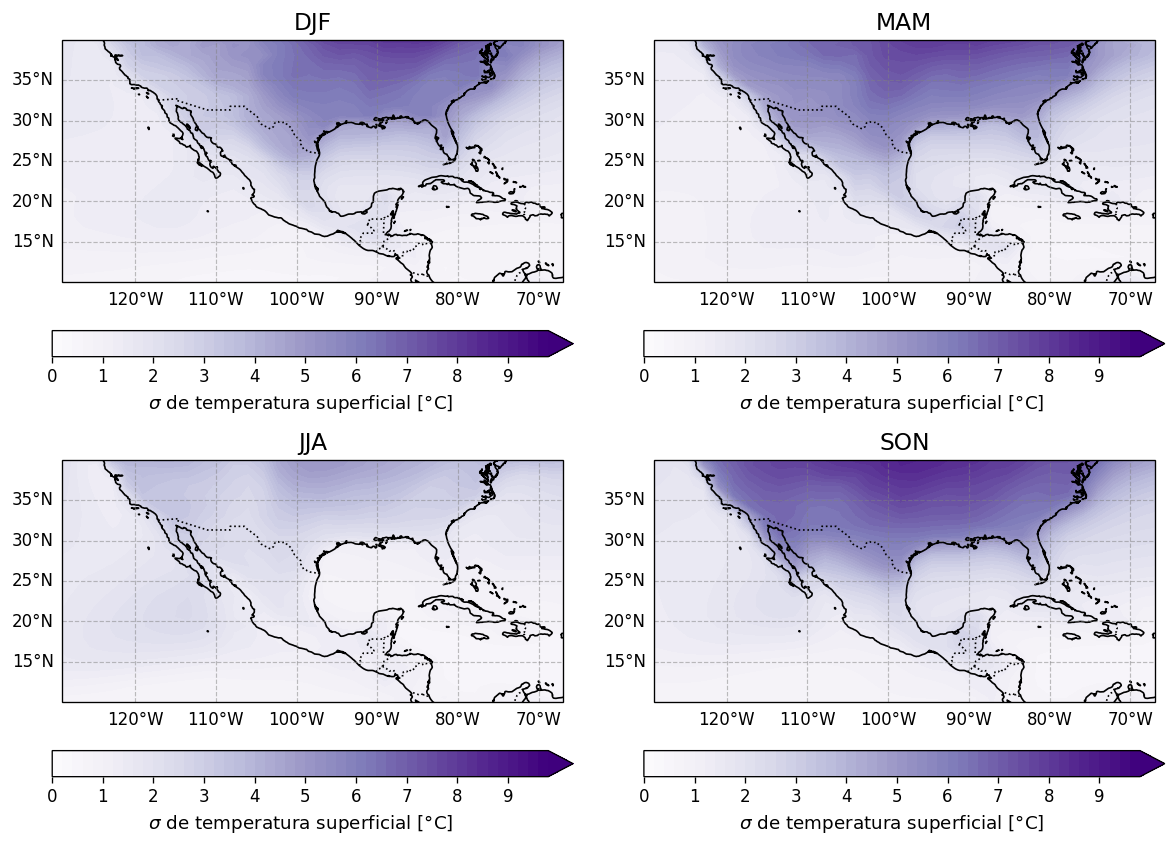

In [17]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=desv.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    datadesv, lon = add_cyclic_point(desv_temp, coord=lons)
    
    cs=ax.contourf(lon,lats,datadesv,levels=np.arange(0,10,0.2),cmap='Purples',extend='max',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel(r'$\sigma$ de temperatura superficial [°C]', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anomalía (anual vs estacional) </i> </h1>

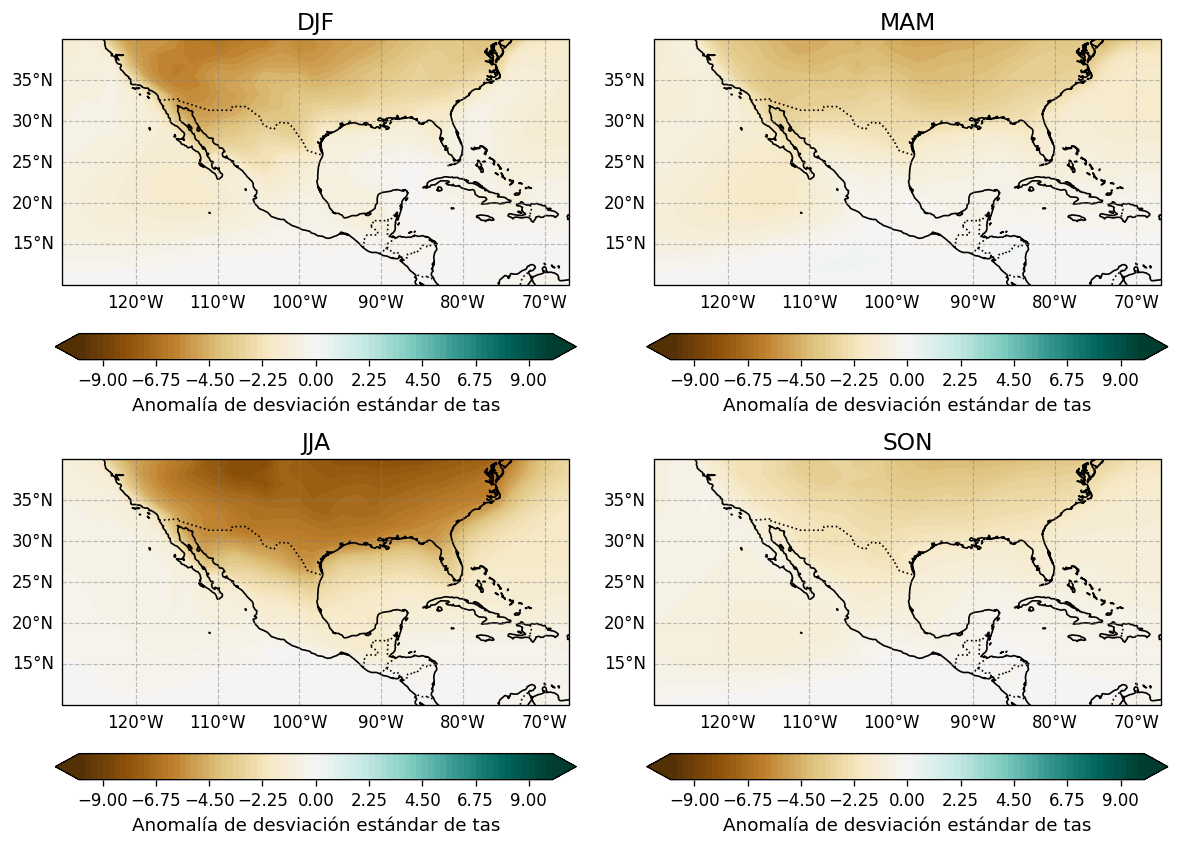

In [18]:
#### anual
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
anomalia = desv - anual 

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=anomalia.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    datadesv, lon = add_cyclic_point(desv_temp, coord=lons)
    
    cs=ax.contourf(lon,lats,datadesv,levels=np.arange(-10,10.25,0.25),cmap='BrBG',extend='both',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Anomalía de desviación estándar de tas', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Anomalía (promedio estacional vs estacional) </i> </h1>

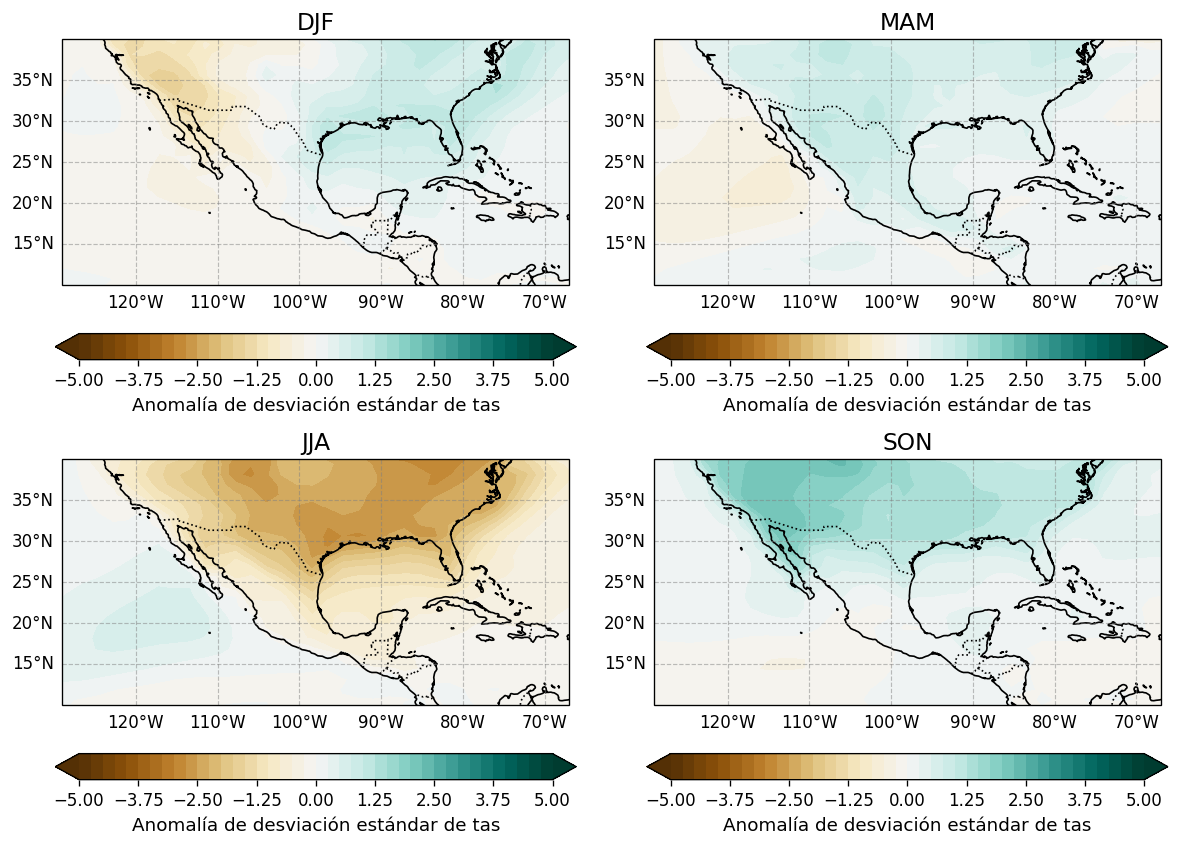

In [19]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)
anomalia = desv - desv.mean('season') 

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    desv_temp=anomalia.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    datadesv, lon = add_cyclic_point(desv_temp, coord=lons)
    
    cs=ax.contourf(lon,lats,datadesv,levels=np.arange(-5,5.1,0.25),cmap='BrBG',extend='both',transform=ccrs.PlateCarree()) #temperatura
   
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--',linewidth=0.7)
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Anomalía de desviación estándar de tas', fontsize=11)
    plt.title(season,fontsize=14)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:purple; font-size:20px;"><i> 1 evento para el centro de México que sea considerado un cold air outbreak. </i> </h1>
Un CAO (cold air outbreak) es un evento con dos o más días continuos con temperatura promedio del aire superficial dos desviaciones estándar debajo de la temperatura promedio del invierno. (Gao et al, 2015)
Es decir:  $$ T < \bar{T} - 2\sigma $$ 




###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Para un solo punto </i> </h1>
- Latitud 19
- Longitud 98

In [20]:
#datos solo de invierno (de los 36 años)
tas_inviernos = tas79.sel(time=tas79['time.month'].isin([12, 1, 2]))

In [21]:
mx_lat = tas_inviernos.sel(lat=19,method='nearest')
mx_lon = mx_lat.sel(lon=262,method='nearest')

In [22]:
mean = mx_lon.mean()      #promedio en invierno
desv_est = mx_lon.std()   #std en invierno
condicionCAO = mean - 2*desv_est  

In [23]:
def CAOS_MX(Tdias):
    """
    Esta función identifica los días cuando se cumple la condición de CAO (Cold Air Outbreak)
    y devuelve las fechas correspondientes en un calendario estándar.
    
    Parámetros:
    - Tdias (xarray.DataArray): Temperatura diaria en invierno durante ~30 años.
    
    Retorna:
    - Listado de fechas en las que ocurre un CAO en formato datetime estándar.
    """
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []
    
    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values
        temp_list.append(temperatura)
    print(len(fechas_CAO_datetime),len(dias_CAO),len(dias_CAO_dates))
    
    promedioT=np.mean(temp_list)
    dicc={'fechas':fechas_CAO_datetime,'temperaturas':temp_list,'freq':len(dias_CAO)/36,'promedioT':promedioT}
    
    return dicc
    # return fechas_indices


In [24]:
CAOS_MX(mx_lon)

98 98 98


{'fechas': DatetimeIndex(['1979-02-01 12:00:00', '1979-02-02 12:00:00',
                '1983-01-06 12:00:00', '1983-01-07 12:00:00',
                '1983-01-07 12:00:00', '1983-01-08 12:00:00',
                '1983-01-26 12:00:00', '1983-01-27 12:00:00',
                '1983-12-22 12:00:00', '1983-12-23 12:00:00',
                '1983-12-23 12:00:00', '1983-12-24 12:00:00',
                '1985-02-01 12:00:00', '1985-02-02 12:00:00',
                '1985-02-02 12:00:00', '1985-02-03 12:00:00',
                '1985-02-03 12:00:00', '1985-02-04 12:00:00',
                '1987-02-09 12:00:00', '1987-02-10 12:00:00',
                '1987-02-18 12:00:00', '1987-02-19 12:00:00',
                '1988-01-23 12:00:00', '1988-01-24 12:00:00',
                '1988-02-10 12:00:00', '1988-02-11 12:00:00',
                '1988-02-11 12:00:00', '1988-02-12 12:00:00',
                '1988-02-12 12:00:00', '1988-02-13 12:00:00',
                '1989-02-23 12:00:00', '1989-02-24 12:00:00'

In [25]:
def CAOS_MX_jlgf(Tdias):
    """
    Esta función identifica los días cuando se cumple la condición de CAO (Cold Air Outbreak)
    y devuelve las fechas correspondientes en un calendario estándar.
    
    Parámetros:
    - Tdias (xarray.DataArray): Temperatura diaria en invierno durante ~30 años.
    
    Retorna:
    - lista de fechas
    - medidas de frecuencia de caos.
    - temperatura
    """
    mean = Tdias.mean()
    desv_est = Tdias.std()
    condicionCAO = mean - 2 * desv_est  
    dias_CAO = []
    temp_list = []
    print(condicionCAO)
    #return
    for i in range(len(Tdias) - 1):
        if Tdias[i] < condicionCAO and Tdias[i + 1] < condicionCAO:
            dias_CAO.append(i)
            dias_CAO.append(i + 1)
            dias_CAOS = pd.DataFrame(dias_CAO).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
    
    # Obtener las fechas correspondientes usando los índices
    dias_CAO_dates = Tdias['time'].values[dias_CAO]

    # Convertir las fechas a un calendario gregoriano estándar 
    fechas_CAO_datetime = pd.to_datetime([str(date) for date in dias_CAO_dates],errors='coerce')    
    fechas_indices = {fecha: dias_CAO[i] for i, fecha in enumerate(fechas_CAO_datetime)}
    
    # Imprimir las fechas y sus índices
    for fecha, indice in fechas_indices.items():
        temperatura = Tdias[indice].values 
        temp_list.append(temperatura)
     #   print(f"Índice: {indice}, Fecha: {fecha}, Temperatura: {temperatura}")
    
    #print(pd.DataFrame(dias_CAO).drop_duplicates().size)
    #print(len(fechas_CAO_datetime),len(dias_CAO),len(dias_CAO_dates))
    promedioT=np.mean(temp_list)
    
    dicc={'fechas':fechas_indices,'temperaturas':temp_list,'freq':len(dias_CAOS)/36,'promedioT':promedioT}
    
    return dicc

In [26]:
CAOS_MX_jlgf(mx_lon)

<xarray.DataArray 'tas' ()> Size: 8B
array(9.18628359)
Coordinates:
    lat      float64 8B 19.38
    lon      float64 8B 261.6
    height   float64 8B 1.5


{'fechas': {Timestamp('1979-02-01 12:00:00'): 30,
  Timestamp('1979-02-02 12:00:00'): 31,
  Timestamp('1983-01-06 12:00:00'): 365,
  Timestamp('1983-01-07 12:00:00'): 366,
  Timestamp('1983-01-08 12:00:00'): 367,
  Timestamp('1983-01-26 12:00:00'): 385,
  Timestamp('1983-01-27 12:00:00'): 386,
  Timestamp('1983-12-22 12:00:00'): 441,
  Timestamp('1983-12-23 12:00:00'): 442,
  Timestamp('1983-12-24 12:00:00'): 443,
  Timestamp('1985-02-01 12:00:00'): 570,
  Timestamp('1985-02-02 12:00:00'): 571,
  Timestamp('1985-02-03 12:00:00'): 572,
  Timestamp('1985-02-04 12:00:00'): 573,
  Timestamp('1987-02-09 12:00:00'): 758,
  Timestamp('1987-02-10 12:00:00'): 759,
  Timestamp('1987-02-18 12:00:00'): 767,
  Timestamp('1987-02-19 12:00:00'): 768,
  Timestamp('1988-01-23 12:00:00'): 832,
  Timestamp('1988-01-24 12:00:00'): 833,
  Timestamp('1988-02-10 12:00:00'): 849,
  Timestamp('1988-02-11 12:00:00'): 850,
  Timestamp('1988-02-12 12:00:00'): 851,
  Timestamp('1988-02-13 12:00:00'): 852,
  Timest

#### El número de días que cumplen la condición de CAO (en 19°N, 98°W) son <b>83</b>, lo que representa el `2.5%` del total de días de invierno de 1979 a 2014 (3240). En promedio, cada año tuvo <b>2.37 días</b> con temperatura dos desviaciones estándar ($\sigma$ = 2.509) menor a la temperatura promedio invernal (14.204°C), es decir, temperatura menor a 9.18°C.

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Para un cuadro de 4x4 </i> </h1>
- Latitud 19 a 24 N
- Longitud 94 a 102 W

In [27]:
#Elegir un cuadro de 4x4
mx_sliced = tas_inviernos.sel(lat=slice(22,27)) #son: array([19.375, 20.625, 21.875, 23.125])
mx_sliced = mx_sliced.sel(lon=slice(255,262)) # son: array([255.9375, 257.8125, 259.6875, 261.5625])

In [28]:
mx_sliced

<xarray.DataArray 'tas' (time: 3240, lat: 4, lon: 4)> Size: 207kB
array([[[ 9.191315 ,  6.9205627, 12.510162 , 17.426666 ],
        [ 6.443756 ,  8.547516 , 14.334137 , 16.12564  ],
        [ 8.623444 , 11.347565 , 14.185944 , 15.16568  ],
        [ 9.330719 , 11.5961   , 15.123444 , 14.877106 ]],

       [[ 8.713776 ,  4.882965 , 10.046295 , 16.47232  ],
        [ 5.8387756,  7.1315002, 10.581207 , 14.914459 ],
        [ 5.0033264,  7.992096 , 11.49942  , 13.404938 ],
        [ 6.9737854,  9.503571 , 11.529205 , 12.062408 ]],

       [[ 9.281403 ,  7.514557 , 12.02652  , 17.831696 ],
        [ 6.7704163,  9.338043 , 12.833405 , 16.490875 ],
        [ 6.9217834, 10.907623 , 14.400055 , 14.998932 ],
        [ 9.23819  , 12.747955 , 13.85318  , 13.929596 ]],

       ...,

       [[10.258209 ,  8.201569 , 12.533844 , 19.098541 ],
        [ 8.864166 ,  9.568268 , 12.845123 , 15.635895 ],
        [ 8.76236  ,  9.761627 , 12.42984  , 13.620514 ],
        [ 8.838287 , 10.907867 , 13.825836 , 12.251129 ]],

       [[10.462311 ,  7.681793 , 12.451569 , 17.66568  ],
        [ 8.9322815,  8.30069  , 12.459625 , 14.281158 ],
        [ 8.883209 ,  9.180328 , 11.675934 , 14.337555 ],
        [ 8.487946 ,  8.7899475, 11.381989 , 11.998932 ]],

       [[10.22818  ,  7.3285217, 13.419586 , 20.168365 ],
        [ 8.557526 ,  7.971344 , 14.553131 , 18.065582 ],
        [ 7.9896545,  9.863434 , 14.538483 , 16.439117 ],
        [ 8.433258 ,  9.386627 , 12.567535 , 14.568512 ]]], dtype=float32)
Coordinates:
  * time     (time) object 26kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lat      (lat) float64 32B 23.12 24.38 25.62 26.88
  * lon      (lon) float64 32B 255.9 257.8 259.7 261.6
    height   float64 8B 1.5

In [29]:
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))
temps = np.zeros((len(latitudes.lat), len(longitudes.lon)))  # matriz que voy a llenar
freqs = np.zeros((len(latitudes.lat), len(longitudes.lon)))

for ilat, lat in enumerate(latitudes.lat):  #para cada latitud
    for ilon, lon in enumerate(longitudes.lon): #para cada longitud
        temp_data = tas_inviernos.sel(lat=lat.item(), lon=lon.item())
        #print(temp_data)# .item() convierte el valor a escalar
        
        temp_series = temp_data.squeeze() 
     # Eliminar dimensiones innecesarias
        #print(lat,lon)
        output = CAOS_MX_jlgf(temp_series)
        #continue
        #break
        temps[ilat, ilon] = np.mean(output['temperaturas'])
        freqs[ilat, ilon] = output['freq']

<xarray.DataArray 'tas' ()> Size: 8B
array(7.58962607)
Coordinates:
    lat      float64 8B 23.12
    lon      float64 8B 255.9
    height   float64 8B 1.5
<xarray.DataArray 'tas' ()> Size: 8B
array(4.81771231)
Coordinates:
    lat      float64 8B 23.12
    lon      float64 8B 257.8
    height   float64 8B 1.5
<xarray.DataArray 'tas' ()> Size: 8B
array(7.04848289)
Coordinates:
    lat      float64 8B 23.12
    lon      float64 8B 259.7
    height   float64 8B 1.5
<xarray.DataArray 'tas' ()> Size: 8B
array(11.62891436)
Coordinates:
    lat      float64 8B 23.12
    lon      float64 8B 261.6
    height   float64 8B 1.5
<xarray.DataArray 'tas' ()> Size: 8B
array(5.04054832)
Coordinates:
    lat      float64 8B 24.38
    lon      float64 8B 255.9
    height   float64 8B 1.5
<xarray.DataArray 'tas' ()> Size: 8B
array(4.11366081)
Coordinates:
    lat      float64 8B 24.38
    lon      float64 8B 257.8
    height   float64 8B 1.5
<xarray.DataArray 'tas' ()> Size: 8B
array(5.50496483)
Coordina

In [30]:
temps 

array([[ 6.70144653,  3.32441139,  5.32235909,  9.96189022],
       [ 3.78646302,  2.22678828,  3.46494818,  6.9335537 ],
       [ 1.43793809,  0.9901306 ,  1.30606806,  3.70878792],
       [-1.27143693, -0.53680348,  0.31818151,  1.32177138]])

In [31]:
freqs #este ya no cuenta duplicados

array([[0.88888889, 1.52777778, 1.72222222, 2.13888889],
       [1.22222222, 1.38888889, 2.25      , 2.88888889],
       [1.63888889, 2.22222222, 2.80555556, 3.16666667],
       [2.        , 2.38888889, 2.75      , 2.69444444]])

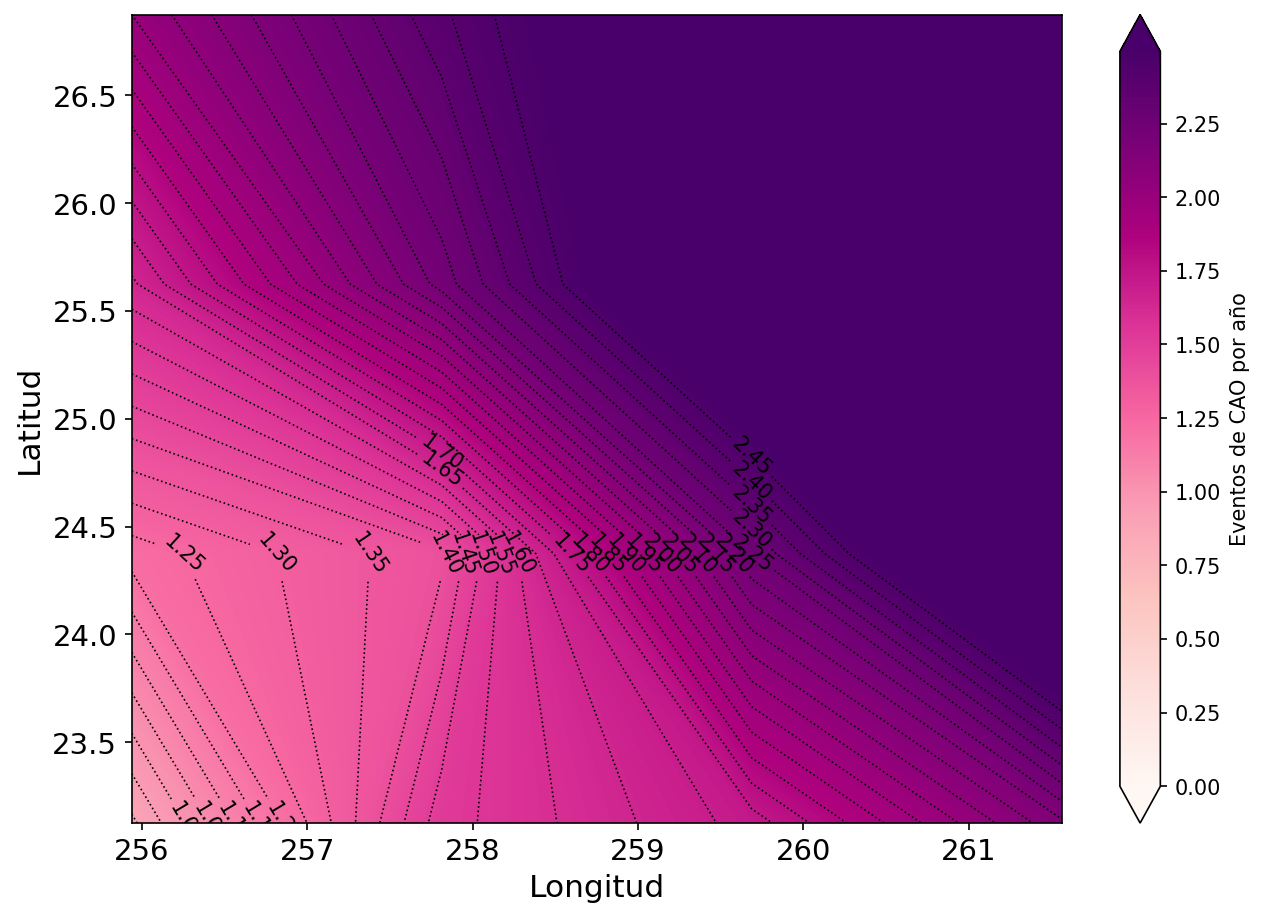

In [32]:
niveles_contourf = np.arange(0, 2.5, 0.005)  
niveles_contour = np.arange(0, 2.5, 0.05)

plt.figure(figsize=(10,7), dpi=150)

plt.contourf(longitudes.lon, latitudes.lat, freqs, levels=niveles_contourf, extend='both',cmap='RdPu')
plt.colorbar(label='Eventos de CAO por año')

cc = plt.contour(longitudes.lon, latitudes.lat, freqs, levels=niveles_contour, colors='k',linewidths=0.8,linestyles=':')
plt.clabel(cc)

plt.xlabel('Longitud', fontsize=15)
plt.ylabel('Latitud', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


In [ ]:
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))

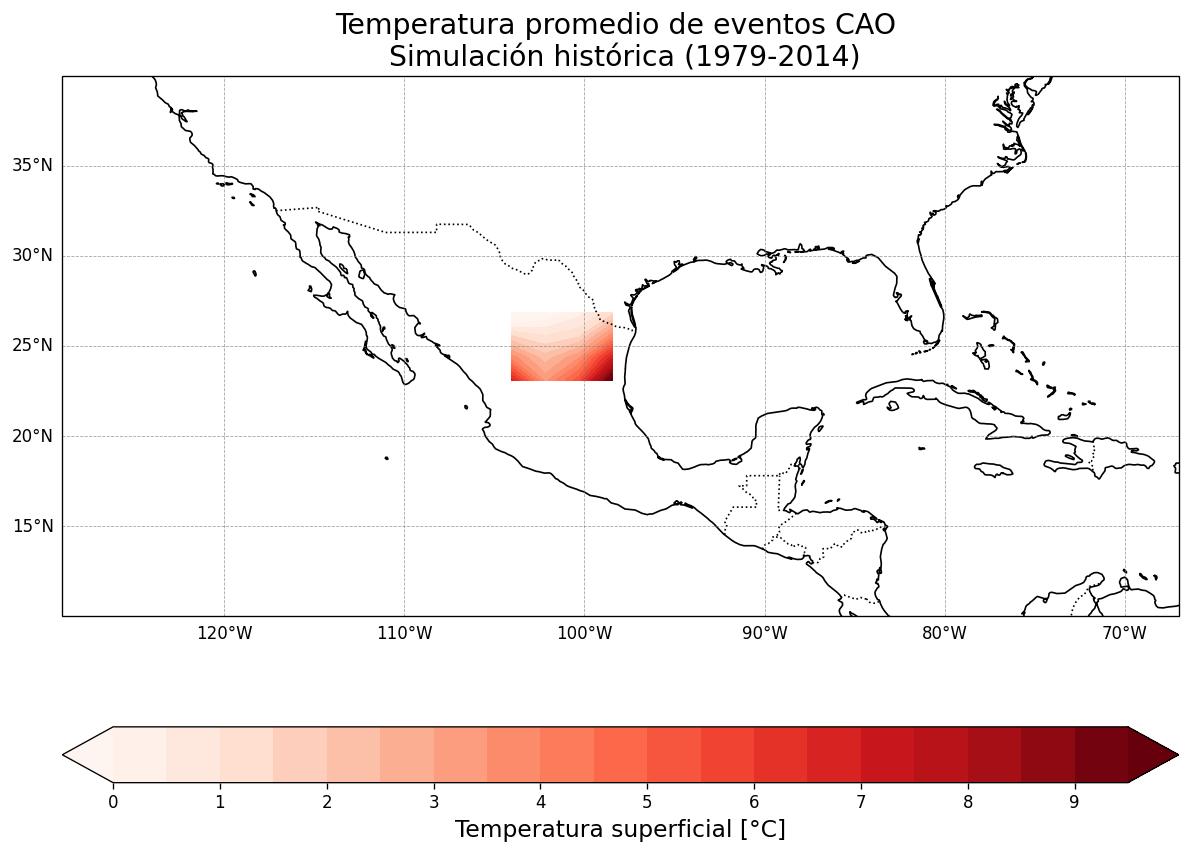

In [33]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

cs=ax.contourf(longitudes.lon,latitudes.lat,temps,levels=np.arange(0,10,0.5),cmap='Reds',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura promedio de eventos CAO \n Simulación histórica (1979-2014)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

###### <h1  style="color:rebeccapurple; font-size:17px;"><i> Para un cuadro de 25x25 </i> </h1>

In [34]:
# latitudes = tas_inviernos.sel(lat=slice(25, 50))
# longitudes = latitudes.sel(lon=slice(251, 276))
# temps = np.zeros((len(latitudes.lat), len(longitudes.lon)))
# for ilat, lat in enumerate(latitudes.lat):  
#     for ilon, lon in enumerate(longitudes.lon): 
#         temp_data = tas_inviernos.sel(lat=lat.item(), lon=lon.item())  # .item() convierte el valor a escalar
#         temp_series = temp_data.squeeze()  # Eliminar dimensiones innecesarias
#         temps[ilat, ilon] = len(CAOS_MX(temp_series))


In [35]:
# niveles_contourf = np.arange(1, 4, 0.005)  
# niveles_contour = np.arange(1, 4, .5)

# plt.figure(figsize=(10,7), dpi=150)

# plt.contourf(longitudes.lon, latitudes.lat, temps/35, levels=niveles_contourf, extend='both')
# plt.colorbar(label='Eventos de CAO')

# cc = plt.contour(longitudes.lon, latitudes.lat, temps/35, levels=niveles_contour, colors='k')
# plt.clabel(cc)

# plt.xlabel('Longitud', fontsize=15)
# plt.ylabel('Latitud', fontsize=15)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# plt.show()


##### peso

In [36]:
latitudes = tas_inviernos.sel(lat=slice(22,27))
longitudes = latitudes.sel(lon=slice(255,262))

In [37]:
weights = np.cos(np.deg2rad(longitudes))
weights.name = "weights"

In [38]:
tas_weighted = longitudes.weighted(weights)

In [39]:
weights # no entiendo qué hace esto

<xarray.DataArray 'weights' (time: 3240, lat: 4, lon: 4)> Size: 207kB
array([[[0.9871605 , 0.99271417, 0.9762576 , 0.954101  ],
        [0.9936825 , 0.988893  , 0.9688684 , 0.960655  ],
        [0.9886951 , 0.98045164, 0.9695055 , 0.96517336],
        [0.98676896, 0.9795889 , 0.96536595, 0.96647877]],

       [[0.9884575 , 0.9963707 , 0.9846671 , 0.95895684],
        [0.9948121 , 0.99226385, 0.9829956 , 0.96631116],
        [0.99618965, 0.99028724, 0.9799267 , 0.9727559 ],
        [0.9926018 , 0.9862753 , 0.97982293, 0.97792053]],

       [[0.98690814, 0.9914117 , 0.97805125, 0.95196015],
        [0.9930265 , 0.9867482 , 0.97502005, 0.9588649 ],
        [0.9927116 , 0.98193353, 0.9685829 , 0.96593064],
        [0.9870295 , 0.9753502 , 0.97091246, 0.97059226]],

       ...,

       [[0.98401517, 0.9897723 , 0.976168  , 0.94495726],
        [0.9880564 , 0.9860883 , 0.9749746 , 0.9629939 ],
        [0.9883287 , 0.9855217 , 0.9765603 , 0.97187674],
        [0.9881259 , 0.98193276, 0.9710266 , 0.9772269 ]],

       [[0.9833746 , 0.99102575, 0.97647864, 0.9528434 ],
        [0.98787254, 0.98952407, 0.9764483 , 0.9690969 ],
        [0.98800516, 0.9871911 , 0.9793079 , 0.96885365],
        [0.98904693, 0.9882552 , 0.98033327, 0.9781515 ]],

       [[0.9841084 , 0.99183106, 0.9726966 , 0.9386835 ],
        [0.988867  , 0.99033755, 0.96791506, 0.9507022 ],
        [0.9902932 , 0.9852188 , 0.96797925, 0.959121  ],
        [0.98918736, 0.98661023, 0.9760402 , 0.9678476 ]]], dtype=float32)
Coordinates:
  * time     (time) object 26kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lat      (lat) float64 32B 23.12 24.38 25.62 26.88
  * lon      (lon) float64 32B 255.9 257.8 259.7 261.6
    height   float64 8B 1.5

In [40]:
norte = tas_weighted.mean(['lon','lat']) #promedio a variable ya pesada
norte #ya lo puedo meter en función de CAO, no'?

<xarray.DataArray 'tas' (time: 3240)> Size: 13kB
array([11.943233,  9.749307, 11.778044, ..., 11.680151, 11.034022,
       12.069647], dtype=float32)
Coordinates:
  * time     (time) object 26kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
    height   float64 8B 1.5

In [44]:
resultados_CAO = CAOS_MX_jlgf(norte) #esto llamó a mi función con el que ya está pesado
fechas_CAO = list(resultados_CAO['fechas'].keys())
fechas_cao = resultados_CAO['fechas']#.keys()
fechas_df = pd.to_datetime(fechas_CAO)  #para que tenga un formato ok

# Extraer los años de las fechas
años = fechas_df.year

# Contar cuántas veces se repite cada año
conteo_años = Counter(años)

# Imprimir el resultado
print("CAOS por año:", conteo_años)

temps_selec = tas_inviernos.isel(time=años) #aquí preguntarle a Jorge, creo que ya está ok 
temps_selec

<xarray.DataArray 'tas' ()> Size: 8B
array(6.00645876)
Coordinates:
    height   float64 8B 1.5
CAOS por año: Counter({1989: 8, 1996: 8, 2007: 8, 2013: 7, 2003: 5, 1988: 4, 1995: 4, 2011: 4, 1979: 3, 1983: 3, 2010: 3, 1981: 2, 1985: 2, 1987: 2, 1991: 2, 1997: 2, 1999: 2, 2001: 2, 2002: 2, 2004: 2, 2008: 2})


<xarray.DataArray 'tas' (time: 77, lat: 144, lon: 192)> Size: 9MB
array([[[-17.707611, -17.69345 , -17.701263, ..., -17.814789,
         -17.781097, -17.743744],
        [-17.190521, -17.142914, -17.075775, ..., -16.539154,
         -16.72763 , -16.927582],
        [-16.166107, -16.331146, -16.450531, ..., -15.244965,
         -15.544769, -15.852631],
        ...,
        [-28.505463, -28.218597, -27.865082, ..., -29.379974,
         -28.977875, -28.711273],
        [-30.476166, -30.345795, -30.322113, ..., -30.80307 ,
         -30.701263, -30.69638 ],
        [-31.674652, -31.644135, -31.65097 , ..., -31.721527,
         -31.706879, -31.694672]],

       [[-17.707611, -17.69345 , -17.701263, ..., -17.814789,
         -17.781097, -17.743744],
        [-17.190521, -17.142914, -17.075775, ..., -16.539154,
         -16.72763 , -16.927582],
        [-16.166107, -16.331146, -16.450531, ..., -15.244965,
         -15.544769, -15.852631],
...
        [-38.357758, -38.056   , -37.662445, ..., -39.265472,
         -38.889496, -38.737396],
        [-35.373383, -35.249603, -35.004486, ..., -35.657074,
         -35.62851 , -35.43979 ],
        [-33.024506, -32.97348 , -32.93393 , ..., -33.010834,
         -33.06308 , -33.015472]],

       [[-21.751068, -21.407562, -21.476898, ..., -22.00888 ,
         -21.8685  , -21.82309 ],
        [-23.593353, -23.952484, -23.289642, ..., -24.449799,
         -23.91806 , -23.872406],
        [-25.687103, -25.806732, -26.062347, ..., -24.674652,
         -24.958588, -25.392181],
        ...,
        [-38.357758, -38.056   , -37.662445, ..., -39.265472,
         -38.889496, -38.737396],
        [-35.373383, -35.249603, -35.004486, ..., -35.657074,
         -35.62851 , -35.43979 ],
        [-33.024506, -32.97348 , -32.93393 , ..., -33.010834,
         -33.06308 , -33.015472]]], dtype=float32)
Coordinates:
  * time     (time) object 616B 2000-12-30 12:00:00 ... 2001-02-04 12:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B 1.5

In [2]:
fechitas=pd.to_datetime(fechas_CAO)

NameError: name 'pd' is not defined

In [1]:
len(fechitas)

NameError: name 'fechitas' is not defined

In [70]:
timevec=tas_inviernos.time

In [72]:
temperaturas_seleccionadas = tas_inviernos.where(timevec==fechitas)#(time=timevec[timevec==fechitas])

ValueError: Lengths must match to compare

In [53]:
print(fechas_cao)

{Timestamp('1979-01-12 12:00:00'): 11, Timestamp('1979-01-13 12:00:00'): 12, Timestamp('1979-01-14 12:00:00'): 13, Timestamp('1981-12-21 12:00:00'): 260, Timestamp('1981-12-22 12:00:00'): 261, Timestamp('1983-01-25 12:00:00'): 384, Timestamp('1983-01-26 12:00:00'): 385, Timestamp('1983-01-27 12:00:00'): 386, Timestamp('1985-02-01 12:00:00'): 570, Timestamp('1985-02-02 12:00:00'): 571, Timestamp('1987-02-08 12:00:00'): 757, Timestamp('1987-02-09 12:00:00'): 758, Timestamp('1988-02-09 12:00:00'): 848, Timestamp('1988-02-10 12:00:00'): 849, Timestamp('1988-02-11 12:00:00'): 850, Timestamp('1988-02-12 12:00:00'): 851, Timestamp('1989-02-10 12:00:00'): 939, Timestamp('1989-02-11 12:00:00'): 940, Timestamp('1989-02-22 12:00:00'): 951, Timestamp('1989-02-23 12:00:00'): 952, Timestamp('1989-12-25 12:00:00'): 984, Timestamp('1989-12-26 12:00:00'): 985, Timestamp('1989-12-27 12:00:00'): 986, Timestamp('1989-12-28 12:00:00'): 987, Timestamp('1991-01-19 12:00:00'): 1098, Timestamp('1991-01-20 12:0

In [45]:
#no me acuerdo cómo estaba, lo hizo Jorge G-F
lista_indices=[fechas_cao[key] for key in resultados_CAO['fechas'].keys()]
temperaturas_seleccionadas = tas_inviernos.isel(time=lista_indices)

In [73]:
temperaturas_seleccionadas.mean('time')

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[-23.096693, -23.090149, -23.086227, ..., -23.097069, -23.09505 ,
        -23.090626],
       [-21.880404, -21.945047, -22.011276, ..., -21.708206, -21.759779,
        -21.811966],
       [-21.13867 , -21.257523, -21.314035, ..., -20.842468, -20.92555 ,
        -21.03531 ],
       ...,
       [-35.18798 , -35.15635 , -35.106308, ..., -35.291286, -35.260532,
        -35.22689 ],
       [-34.841934, -34.81983 , -34.795338, ..., -34.978756, -34.93825 ,
        -34.899574],
       [-34.683823, -34.688446, -34.683586, ..., -34.679337, -34.675934,
        -34.703327]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B 1.5

In [ ]:
#SOLO LAS FECHAS QUE ME DIO AL EVALUAR FUNCION CAO]
# for year in years:
# N=len(ista_fechas[lista_fechas.year==year])
### esta es una idea ^^^

In [57]:
tas_inviernos

<xarray.DataArray 'tas' (time: 3240, lat: 144, lon: 192)> Size: 358MB
array([[[-19.20517 , -19.150482, -19.182953, ..., -19.237152,
         -19.224945, -19.216156],
        [-17.735443, -17.909515, -17.969818, ..., -17.698334,
         -17.761322, -17.741058],
        [-16.696136, -16.786224, -16.823578, ..., -16.524994,
         -16.711273, -16.677094],
        ...,
        [-40.36313 , -40.5372  , -40.72104 , ..., -39.99765 ,
         -40.109222, -40.222992],
        [-40.421967, -40.617035, -40.77939 , ..., -40.252045,
         -40.217377, -40.222992],
        [-40.736908, -40.757416, -40.78891 , ..., -40.650238,
         -40.663666, -40.70468 ]],

       [[-19.615814, -19.68393 , -19.71518 , ..., -19.661713,
         -19.591888, -19.561127],
        [-16.426605, -16.526215, -16.664154, ..., -16.93515 ,
         -16.887543, -16.646088],
        [-17.770111, -17.304047, -17.289154, ..., -17.215424,
         -17.483734, -17.645844],
...
        [-30.500824, -30.13388 , -29.970795, ..., -31.301605,
         -31.223724, -30.860687],
        [-30.053802, -30.217865, -29.84018 , ..., -30.048187,
         -30.315765, -30.436127],
        [-30.196625, -30.463226, -30.321136, ..., -30.292328,
         -30.246918, -30.068695]],

       [[-15.808197, -15.7789  , -15.774994, ..., -15.857269,
         -15.835541, -15.800873],
        [-14.925873, -14.876556, -14.850922, ..., -15.022797,
         -14.964691, -14.933197],
        [-14.047699, -14.020599, -14.020111, ..., -13.843597,
         -14.031586, -13.991791],
        ...,
        [-35.428802, -35.23642 , -35.00644 , ..., -35.92856 ,
         -35.785492, -35.591156],
        [-35.722015, -35.730804, -35.71054 , ..., -35.640472,
         -35.625824, -35.67514 ],
        [-31.93515 , -31.989594, -31.894135, ..., -31.735199,
         -31.929047, -31.895111]]], dtype=float32)
Coordinates:
  * time     (time) object 26kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B 1.5

In [58]:
temperaturas_seleccionadas = tas_inviernos.isel(time=lista_indices) #esto era con indices

In [47]:
temps_selecN = norte.isel(time=años) #esto es con años

In [60]:
setentaysiete=temperaturas_seleccionadas.mean('time')
setentaysiete #es el promedio de mis 77 eventos

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[-23.096693, -23.090149, -23.086227, ..., -23.097069, -23.09505 ,
        -23.090626],
       [-21.880404, -21.945047, -22.011276, ..., -21.708206, -21.759779,
        -21.811966],
       [-21.13867 , -21.257523, -21.314035, ..., -20.842468, -20.92555 ,
        -21.03531 ],
       ...,
       [-35.18798 , -35.15635 , -35.106308, ..., -35.291286, -35.260532,
        -35.22689 ],
       [-34.841934, -34.81983 , -34.795338, ..., -34.978756, -34.93825 ,
        -34.899574],
       [-34.683823, -34.688446, -34.683586, ..., -34.679337, -34.675934,
        -34.703327]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B 1.5

In [48]:
setentaysiete=temps_selecN.mean('time')
setentaysiete #es el promedio de mis 77 eventos

<xarray.DataArray 'tas' ()> Size: 4B
array(9.604076, dtype=float32)
Coordinates:
    height   float64 8B 1.5

In [61]:
anomalia=setentaysiete-tas_djf

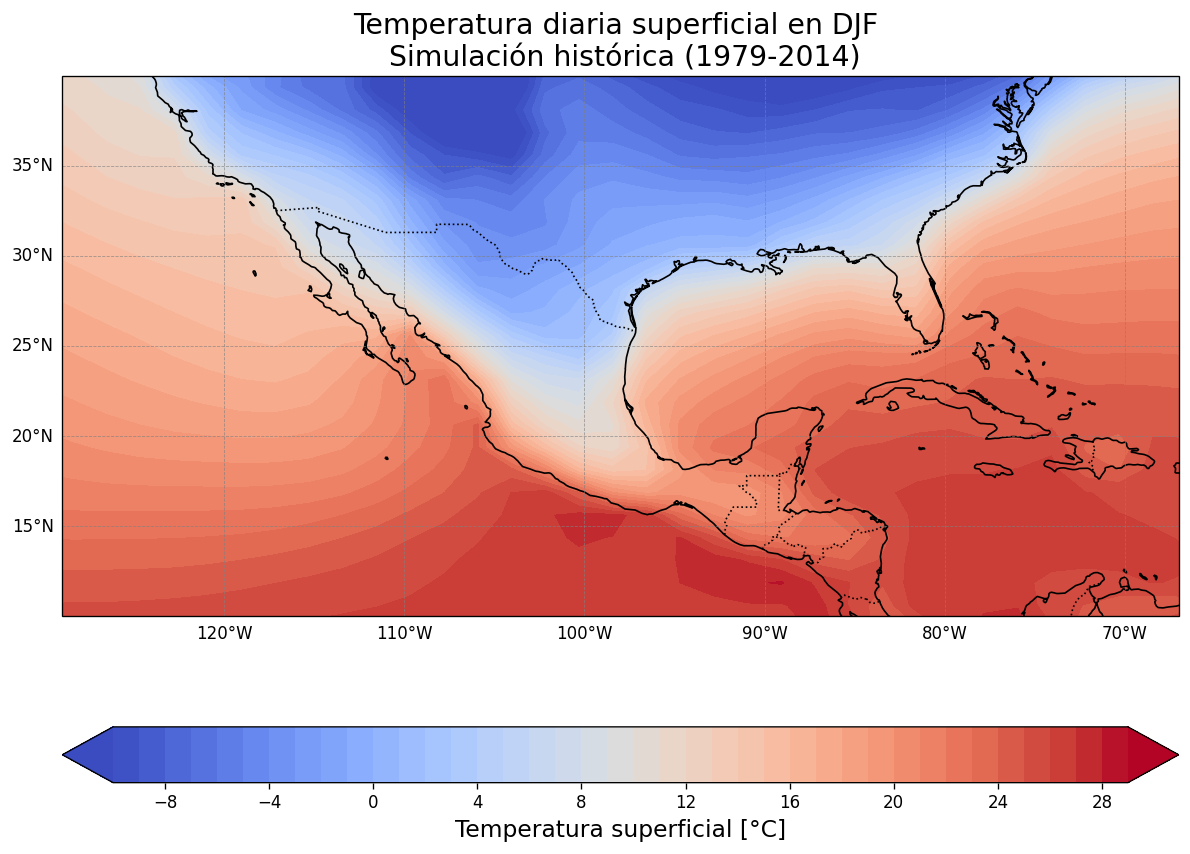

In [62]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
datatemp, lon = add_cyclic_point(setentaysiete, coord=lons)
cs=ax.contourf(lon,lats,datatemp,levels=np.arange(-10,30,1),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('Temperatura diaria superficial en DJF \n Simulación histórica (1979-2014)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()

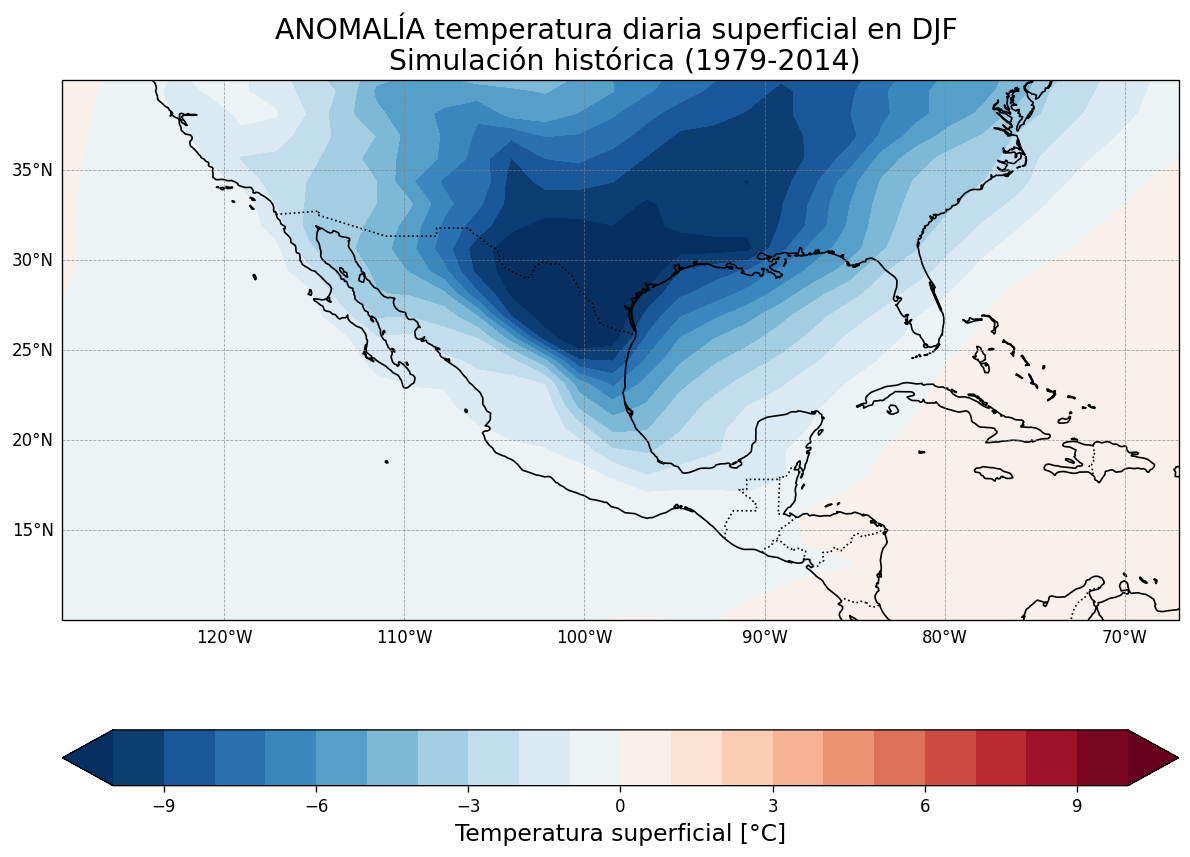

In [63]:
fig = plt.figure(figsize=(10, 7), dpi=120)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
datatemp, lon = add_cyclic_point(anomalia, coord=lons)
cs=ax.contourf(lon,lats,datatemp,levels=np.arange(-10,10.1,1),cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree()) #temperatura
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
plt.title('ANOMALÍA temperatura diaria superficial en DJF \n Simulación histórica (1979-2014)',fontsize=17)
plt.tight_layout(h_pad=2,pad=1)
plt.show()